In [7]:
using DifferentialEquations, Plots


function R(x)
    x * exp(-x)
end

# represents derivatives du, functions u, model parameters p, and time t
function love_model(du, u, p, t) 
     A_1, A_2, alpha, rho, K = p
     du[1] = - alpha * u[1] + rho * A_2 + K * R(u[2])
     du[2] = - alpha * u[2] + rho * A_1 + K * R(u[1])
end

love_model (generic function with 1 method)

In [8]:
model_parameters = [1.2, 1., 1., 1., 15.]
initial_vals = [0., 0.]
tspan = (0., 50.)


prob = ODEProblem(love_model, initial_vals, tspan, model_parameters)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 2-element Vector{Float64}:
 0.0
 0.0

In [3]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 43-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.006810827268449164
  0.01854462080048615
  0.03532540286098988
  0.057072711132854066
  0.08502532262984185
  0.12008293177221911
  0.1650339531436068
  0.23068571263023302
  0.30479115652119115
  0.4077505666090117
  ⋮
 17.877573905450813
 21.003296464622565
 25.151535140261828
 28.832176414217138
 31.881028773744177
 34.555610081700316
 37.0911089764182
 39.64521173280557
 42.294582999102
 45.049844214668525
 47.87646970542637
 50.0
u: 43-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.00010008502447336595, 0.00012006903520210609]
 [0.0011103176627724179, 0.0013283958818451325]
 [0.007212989464920806, 0.008504229803515782]
 [0.02163104330160952, 0.02485310129085846]
 [0.04709603907498144, 0.05257470987443975]
 [0.08978724941975225, 0.09758709432671532]
 [0.1631287

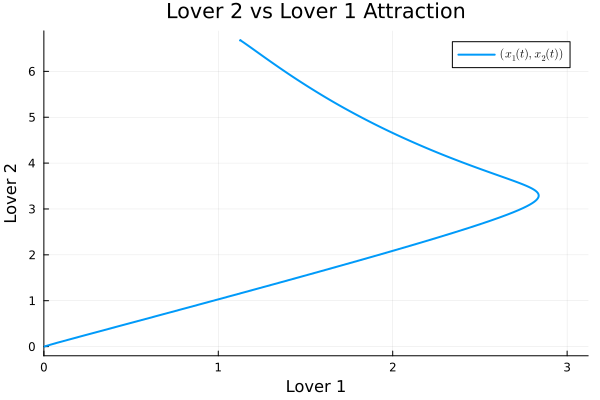

In [13]:
using LaTeXStrings
plot(sol, idxs=(1, 2), linewidth=2, title ="Lover 2 vs Lover 1 Attraction",
    xaxis = "Lover 1", yaxis = "Lover 2", label=L"(x_1(t), x_2(t))"
)

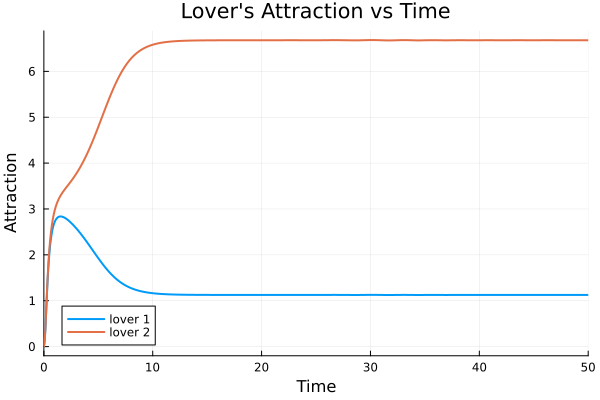

In [10]:
plot(sol, linewidth=2, title ="Lover's Attraction vs Time", xaxis = "Time", 
    yaxis = "Attraction", label=["lover 1" "lover 2"]
)

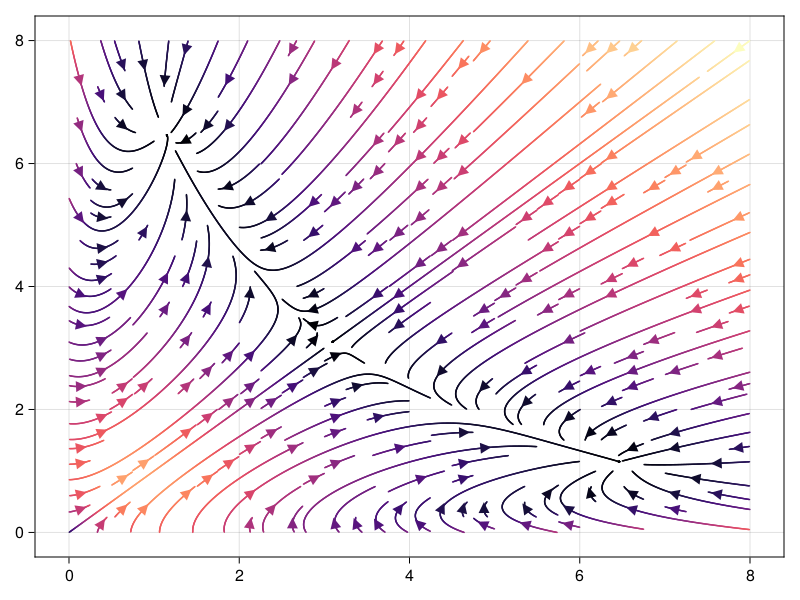

In [6]:
using CairoMakie


struct LoveModelParams{T}
    A_1::T
    A_2::T
    alpha::T
    rho::T
    K::T
end

P = LoveModelParams(1., 1., 1., 1., 15.)

f(u, P::LoveModelParams) = Point2f(
    - P.alpha * u[1] + P.rho * P.A_2 + P.K * u[2] * exp(-u[2]),
    - P.alpha * u[2] + P.rho * P.A_1 + P.K * u[1] * exp(-u[1])
)

f(x) = f(x, P)

streamplot(f, 0..8., 0..8., colormap=:magma)